# DAY 3
## Feature Normalization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# As we know that our features on in some range like range(1,100) -> 1 to 99
# this is becuase our cost function graph become skinny
# in other words if we do minor change in theta our cost will increse rapidly

In [96]:
# This is all from Day 1 Stuff

# Cost Function
def Cost_function(h, Y):
    m = Y.shape[0]
    error = h - Y
    sqrError = np.power(error,2)
    sumOfError = np.sum(sqrError)
    J = 1/(2*m) * sumOfError
    return J

# Hypothesis
def hypothesis(X, theta):
    h = X.dot(theta)
    return h

# Add Bais
def add_bais(X):
    Xbais = np.insert(X, 0, 1, axis=1)
    return Xbais


# Generate Data
def generate_data(num):
    X = np.array(range(num)).reshape(-1,1)
    Y = np.array(range(num)).reshape(-1,1)
    theta = np.random.random((X.shape[1]+1,1))
    return (X,Y,theta)

# Cost function graph
def cost_function_graph(X,Y,theta,min_theta, max_theta):
    # theta[0] = 0 Becuase of We want 2 dimesion Graph
    theta[0]=0
    
    theta_range = np.array(range(min_theta, max_theta))
    J_hist = []
    for i in theta_range:
        theta[1] = i
        h = hypothesis(X,theta)
        J = Cost_function(h, Y)
        J_hist.append(J)
    
    plt.plot(theta_range, J_hist, 'r')
    plt.ylabel('Cost')
    plt.xlabel('theta_1')
    plt.grid(True)

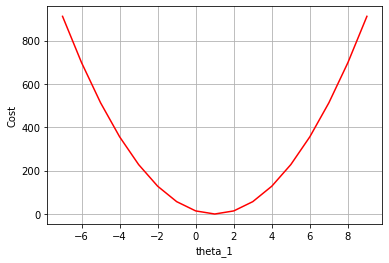

In [97]:
# Costt Function Graph (Thteta_1)
X, Y, theta = generate_data(10)
Xbais = add_bais(X)
h = hypothesis(Xbais,theta)
cost_function_graph(Xbais,Y,theta,-10+3, 10)

In [98]:
# As Show in this Figure minor chnage in theta_1 imapct lot of on Cost
# So we need to make sure that our features ar on similar scale
# Just like (-1 <= x <= 1)
# So we need tto apply some statistical technique to range it down 

In [99]:
# Mean Normalization

Xnorm1 = (X-np.average(X))/np.max(X)
Xnorm1

# Range Between -0.5 <= x <= 0.5

array([[-0.5       ],
       [-0.38888889],
       [-0.27777778],
       [-0.16666667],
       [-0.05555556],
       [ 0.05555556],
       [ 0.16666667],
       [ 0.27777778],
       [ 0.38888889],
       [ 0.5       ]])

In [100]:
# Standard Normalization

Xnorm2 = (X-np.average(X))/np.std(X)
Xnorm2

# Range Between -1.5 <= x <= 1.5

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

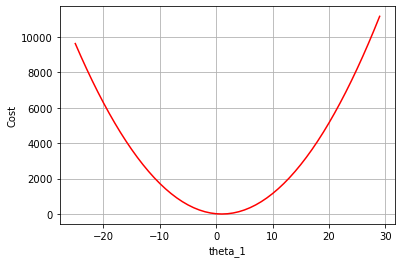

In [101]:
# using Mean Normalization

Xbais1 = add_bais(Xnorm1)
h = hypothesis(Xbais,theta)
cost_function_graph(Xbais,Y,theta,-25, 30)

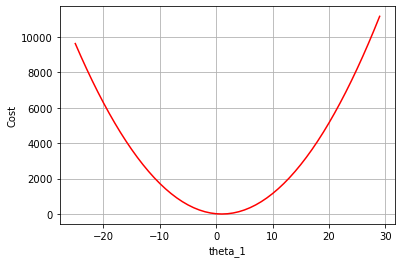

In [102]:
# using standard Normalization

Xbais2 = add_bais(Xnorm2)
h = hypothesis(Xbais,theta)
cost_function_graph(Xbais,Y,theta,-25, 30)

In [103]:
# we can speed up gradient descent by having each of our input value roughly the average
# this is because theta will descend quickly on small range (-1 <= x <= 1) 
# & slowly on large range (1 <= x <= 100)

In [117]:
# this is Day 2 Old Stuff (Gradient Descent)
# Implmentation of Gradient Descent

def Gradient_descent(X, Y, theta, alpha=0.3, itr=50):
    i = 0
    J_array = []
    theta_values = []
    m = X.shape[0]
    while i < itr:
        
        # This is not Part of Graient Descent 
        # This is jst for ploting Graph of our convergence
        theta_values.append(np.copy(theta[1]))
        
        # Calculate Hypothesis
        h_error = hypothesis(X,theta)
        
        # Changing Thetas Values
        temp0 = alpha * (1/m) * (h_error-Y).T.dot(X[:,0].reshape(-1,1))
        temp1 = alpha * (1/m) * (h_error-Y).T.dot(X[:,1].reshape(-1,1))
        theta[0] = theta[0] - temp0
        theta[1] = theta[1] - temp1
        
        # Collecting Value of Cost Function For
        # itreation Vs. Cost Graph
        J_array.append(Cost_function(h_error, Y))
        
        i+=1
        
    return J_array,theta,theta_values

# Plot Graph
def plot_graph(X,Y,h,num):
    plt.figure(num)
    plt.plot(X,Y,'go')
    plt.plot(X,h,'b')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    
# Cost Vs. Iteration Graph
def CostVsItr(J_array,n):
    plt.figure(n)
    plt.plot(range(len(J_array)),J_array,'b')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost function')
    plt.grid(True)

# theta_1 Vs. Cost Function Graph  
def theta_cost(X,Y,theta,theta_values,itr):
    theta_copy = np.copy(theta)
    theta_copy[0] = 0
    J = []
    J2 = []

    for i in np.linspace(np.min(theta_values),np.max(theta_values),itr):
        theta_copy[1] = i
        h_error = hypothesis(X,theta_copy)
        J.append(Cost_function(Y,h_error))

    for i in theta_values:
        theta_copy[1] = i
        h_error = hypothesis(X,theta_copy)
        J2.append(Cost_function(Y,h_error))

    # Cost Function Vs. Theta1 Graph
    theta_1 = np.linspace(np.min(theta_values),np.max(theta_values),itr).reshape(-1,1)
    plt.figure(4)
    plt.plot(theta_1,J,'b')
    plt.plot(theta_values,J2,'r')
    plt.xlabel('theta_1')
    plt.ylabel('Cost')
    plt.legend('CT')
    plt.title('theta_1 Vs. Cost function')
    plt.grid(True)


# Run All sort of Functions
def Run(flag,alpha,itr,data):
    X,Y,theta = generate_data(data)
    
    if flag:
        Xnorm = (X-np.average(X))/np.max(X)
    else:
        Xnorm = (X-np.average(X))/np.std(X)
    
    Xbais = add_bais(Xnorm)
        
    # Before
    print("")
    h = hypothesis(Xbais,theta)
    plot_graph(X,Y,h,1)
    
    J_array,theta,theta_values = Gradient_descent(Xbais, Y, theta, alpha, itr)
    
    # After
    h = hypothesis(Xbais,theta)
    plot_graph(X,Y,h,2)
    
    # Cost Vs. Iteration
    CostVsItr(J_array,3)
    
    # theta_1 Vs. Cost Graph (step Size)
    theta_cost(Xbais,Y,theta,theta_values,itr)
    

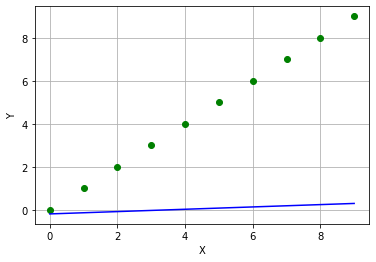

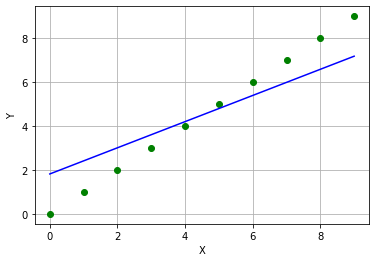

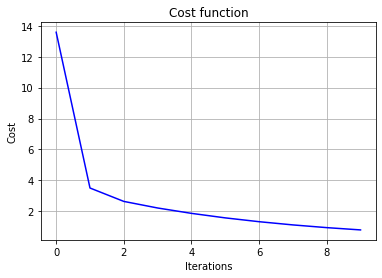

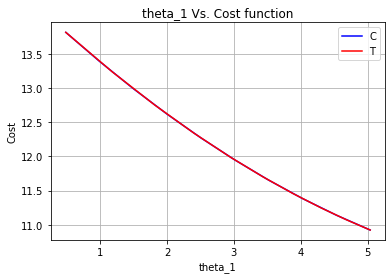

In [173]:
# Meean Normalizattion
Run(True,alpha=0.8,itr=10,data=10)

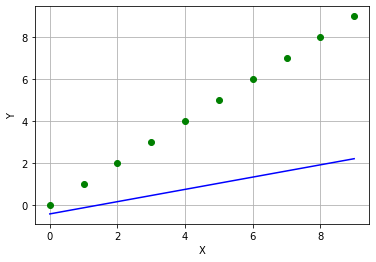

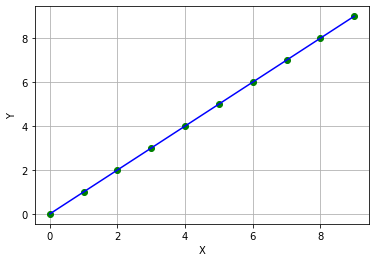

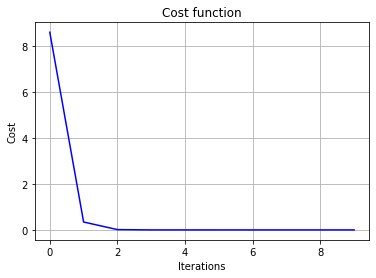

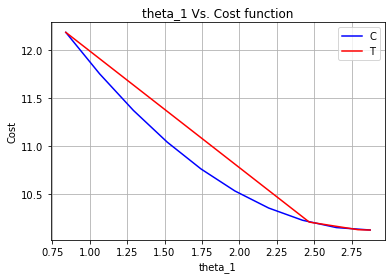

In [174]:
# Standard Normalization
Run(False,alpha=0.8,itr=10,data=10)